**Figures and Tables for GFPMpt validation**
 - In this Jupyter script, there are figures and tables that represent the analysis of results of GFPMpt at both aggregated and detailed levels for countries and products. The evaluation also includes forest data, manufacturing data, world market prices, and carbon prices.

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


**Load all data**

In [1]:
#Data of all domains
#for every period

**Figure 1:**
- tile representation of all aggregated data
- Choose between Szenario, Produkt and Supply, Demand, Manufacture, Import, Export 
- Choose if you wanna see bounds

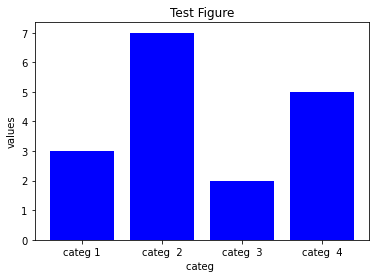

In [6]:
### Insert the code for the tile representation of various products for supply, demand, export, import, manufacture for FAO data, and different scenarios of GFPMpt

categories = ['categ 1', 'categ  2', 'categ  3', 'categ  4']
values = [3, 7, 2, 5]

plt.bar(categories, values, color='blue')

plt.xlabel('categ ')
plt.ylabel('values')
plt.title('Test Figure')

plt.show()



**Figure 2:**
- headmap comparison of deviations between GFPM and various scenarios of GFPMpt
- User input selection for scenario in GFPMpt

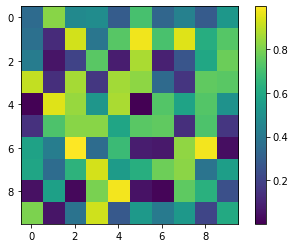

In [8]:
data = np.random.rand(10, 10)

plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar()

plt.show()

**Table 1:**
- Results table with a simple drop-down for selecting the country, period, scenario, model, domain, etc. (Data basis for Figure 3)

In [11]:
print("test1")


test1


**Figure 3:**
- Pivot Chart with line chart
- User input for country, commodity, domain
- quantity and supply
- comparison between GFPM and various scenarios of GFPMpt

**Table 2:**
- Displaying world market prices
- analyzing deviations between GFPM and GFPMpt or different GFPMpt scenarios in terms of relative frequency

**Figure 4:**
- visualization of forest area and forest stock as line bar
- comparision between GFPM and GFPMpt, or different scenarios of GFPMpt


In [ ]:
#forest area and stock over years in a line bar or bar chart